## Introduction 

This project is about "Olist", a Brazilian ecommerce store which has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil where its features allow viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
orders = pd.read_csv('data/olist_orders_dataset.csv')
customers = pd.read_csv("data/olist_customers_dataset.csv")
payments = pd.read_csv('data/olist_order_payments_dataset.csv')
products = pd.read_csv("data/olist_products_dataset.csv")
name_translations = pd.read_csv("data/product_category_name_translation.csv")
geolocations = pd.read_csv("data/olist_geolocation_dataset.csv")
items = pd.read_csv("data/olist_order_items_dataset.csv")

## Understanding the data

### Datasets

##### Orders Dataset: 

This is the dataset that contains the order information

In [3]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


##### Customers Dataset:

This dataset has information about the customer and their location.

In [4]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


##### Payments Dataset:

This dataset contains information about the payment method(s) used for each order. There can be multiple payment methods and separate payment installations for each order.

In [5]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


##### Products Dataset:

This dataset contains information about every product available on olist.com 

In [6]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


##### Name translations Dataset:

This dataset contains translations of each product category (listed in Portuguese) in English.

In [7]:
name_translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


##### Geolocation Dataset:

This dataset contains the Brazilian zip codes and the latitude/longitude coordinates present within the area represented by the zip-code for geographic analysis

In [8]:
geolocations.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


##### Order items Dataset:

This dataset contains information about the items purchased within each order.



In [9]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


The following datasets will be merged so that we can work with the complete dataset containing all the necessary information for our analysis.

In [10]:
datasets = {
    'customers': customers,
    'payments': payments,
    'products': products,
    'name_translations': name_translations,
    'orders': orders,
    'items': items
}
for name1, dataset1 in datasets.items():
    for name2, dataset2 in datasets.items():
        if name1 != name2:
            common_keys = set(dataset1.columns).intersection(set(dataset2.columns))
            if common_keys:  
                print(f'Common columns between dataset of {name1} and dataset of {name2}: {common_keys}')

Common columns between dataset of customers and dataset of orders: {'customer_id'}
Common columns between dataset of payments and dataset of orders: {'order_id'}
Common columns between dataset of payments and dataset of items: {'order_id'}
Common columns between dataset of products and dataset of name_translations: {'product_category_name'}
Common columns between dataset of products and dataset of items: {'product_id'}
Common columns between dataset of name_translations and dataset of products: {'product_category_name'}
Common columns between dataset of orders and dataset of customers: {'customer_id'}
Common columns between dataset of orders and dataset of payments: {'order_id'}
Common columns between dataset of orders and dataset of items: {'order_id'}
Common columns between dataset of items and dataset of payments: {'order_id'}
Common columns between dataset of items and dataset of products: {'product_id'}
Common columns between dataset of items and dataset of orders: {'order_id'}


Based on the common colums between the datasets, I will perform the following merges to obtain the dataset with all needed columns.

In [11]:
# Merging orders with customers on customer_id
merged_df = orders.merge(customers, on='customer_id', how='left')

# Merging the result with payments on order_id
merged_df = merged_df.merge(payments, on='order_id', how='left')

# Merging the result with items on order_id
merged_df = merged_df.merge(items, on='order_id', how='left')

# Merging the result with products on product_id
merged_df = merged_df.merge(products, on='product_id', how='left')

# Merging the result with name_translations on product_category_name
merged_df = merged_df.merge(name_translations, on='product_category_name', how='left')


In [12]:
merged_df['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [13]:
merged_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

| Attribute                          | Description                                                                 |
|------------------------------------|-----------------------------------------------------------------------------|
| `order_id`                         | Unique identifier for each order.                                           |
| `customer_id`                      | Unique identifier for each customer.                                        |
| `order_status`                     | Status of the order (e.g., delivered, shipped, processing).                 |
| `order_purchase_timestamp`         | Timestamp when the order was placed.                                        |
| `order_approved_at`                | Timestamp when the order was approved.                                      |
| `order_delivered_carrier_date`     | Date when the order was handed over to the carrier.                         |
| `order_delivered_customer_date`    | Date when the order was delivered to the customer.                          |
| `order_estimated_delivery_date`    | Estimated delivery date for the order.                                      |
| `customer_unique_id`               | Unique identifier for each customer (alternative to `customer_id`).         |
| `customer_zip_code_prefix`         | Zip code prefix of the customer's location.                                 |
| `customer_city`                    | City of the customer's location.                                            |
| `customer_state`                   | State of the customer's location.                                           |
| `payment_sequential`               | Sequential number of the payment within an order.                           |
| `payment_type`                     | Type of payment (e.g., credit_card, voucher).                               |
| `payment_installments`             | Number of installments for the payment.                                     |
| `payment_value`                    | Value of the payment.                                                       |
| `order_item_id`                    | Unique identifier for each item within an order.                            |
| `product_id`                       | Unique identifier for each product.                                         |
| `seller_id`                        | Unique identifier for each seller.                                          |
| `shipping_limit_date`              | Latest date by which the order should be shipped.                           |
| `price`                            | Price of the product.                                                       |
| `freight_value`                    | Freight value for the shipping of the product.                              |
| `product_category_name`            | Category name of the product.                                               |
| `product_name_lenght`              | Length of the product name.                                                 |
| `product_description_lenght`       | Length of the product description.                                          |
| `product_photos_qty`               | Number of photos available for the product.                                 |
| `product_weight_g`                 | Weight of the product in grams.                                             |
| `product_length_cm`                | Length of the product in centimeters.                                       |
| `product_height_cm`                | Height of the product in centimeters.                                       |
| `product_width_cm`                 | Width of the product in centimeters.                                        |
| `product_category_name_english`    | English name of the product category.                                       |


For the purpose of RFM, i will be dropping the unnessary columns in my dataset.

In [14]:
rfm_df = merged_df[['order_id', 'customer_unique_id', 'order_status', 'order_purchase_timestamp', 'product_category_name_english', 'payment_value']]
rfm_df['order_purchase_timestamp'] = pd.to_datetime(rfm_df['order_purchase_timestamp'])

In [15]:
rfm_df.rename(columns = {'order_purchase_timestamp':'order_date', 'customer_zip_code_prefix':'customer_zipcode', 'product_category_name_english':'product_category', 'payment_value':'price', 'customer_unique_id': 'customer_id'},  inplace=True)

In [16]:
def check_data(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    
check_data(rfm_df)

------------------------------- SHAPE --------------------------------
Rows: 118434
Columns: 6
------------------------------- TYPES --------------------------------
order_id                    object
customer_id                 object
order_status                object
order_date          datetime64[ns]
product_category            object
price                      float64
dtype: object
--------------------------- MISSING VALUES ---------------------------
order_id               0
customer_id            0
order_status           0
order_date             0
product_category    2553
price                  3
dtype: int64
------------------------- DUPLICATED VALUES --------------------------
14306


In [17]:
min_order_date = rfm_df.order_date.min()
max_order_date = rfm_df.order_date.max()
print("Min Order Date is: ", min_order_date)
print("Max Order Date is: ", max_order_date)
date_difference = max_order_date - min_order_date
days = date_difference.days
years = days // 365
months = (days % 365) // 30
remaining_days = (days % 365) % 30
print(f"Length of the analysis: {years} years, {months} months, {remaining_days} days")

Min Order Date is:  2016-09-04 21:15:19
Max Order Date is:  2018-10-17 17:30:18
Length of the analysis: 2 years, 1 months, 12 days


### Dropping missing values

Since the missing values in the product category are of no interest to my analysis, i will keep them.
Whilst the missing values in the price, I will first check them then drop them.

In [18]:
a = rfm_df[rfm_df['price'].isna()] # The orders were all delivered yet no price was registered, I will drop them

In [19]:
a

,order_id,customer_id,order_status,order_date,product_category,price
36657,bfbd0f9bdef84302105ad712db648a6c,830d5b7aaa3b6f1e9ad63703bec97d23,delivered,2016-09-15 12:16:38,health_beauty,NaN
36658,bfbd0f9bdef84302105ad712db648a6c,830d5b7aaa3b6f1e9ad63703bec97d23,delivered,2016-09-15 12:16:38,health_beauty,NaN
36659,bfbd0f9bdef84302105ad712db648a6c,830d5b7aaa3b6f1e9ad63703bec97d23,delivered,2016-09-15 12:16:38,health_beauty,NaN


These orders could be giveaways or influencers' orders.

In [20]:
rfm_df = rfm_df[rfm_df['price'].notna()]

In [21]:
rfm_df.set_index('order_date', inplace=True)

In [22]:
rfm_df

,order_id,customer_id,order_status,product_category,price
order_date,,,,,
2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,housewares,18.12
2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,housewares,2.00
2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,housewares,18.59
2018-07-24 20:41:37,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,perfumery,141.46
2018-08-08 08:38:49,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,auto,179.12
...,...,...,...,...,...
2018-02-06 12:58:58,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,delivered,baby,195.00
2017-08-27 14:46:43,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,delivered,home_appliances_2,271.01
2018-01-08 21:28:27,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,delivered,computers_accessories,441.16


### Dropping Duplicated values

In [23]:
rfm_df = rfm_df.drop_duplicates()

In [24]:
rfm_df.shape

(104127, 5)

Checking for cancelled orders:

In [25]:
cancelled_orders = rfm_df[rfm_df['order_status'] == 'canceled']

In [26]:
len(cancelled_orders)

654

In [27]:
len(rfm_df)

104127

In [28]:
percentage_cancelled = (len(cancelled_orders) / len(rfm_df)) * 100
print(f'percentage of cancelled orders out of all orders is: {percentage_cancelled}%')

percentage of cancelled orders out of all orders is: 0.6280791725489067%


In [30]:
rfm_df = rfm_df[rfm_df['order_status'] != 'canceled']

Lets do some descriptive analysis on the numerical columns: 

In [31]:
rfm_df.dtypes

order_id             object
customer_id          object
order_status         object
product_category     object
price               float64
dtype: object

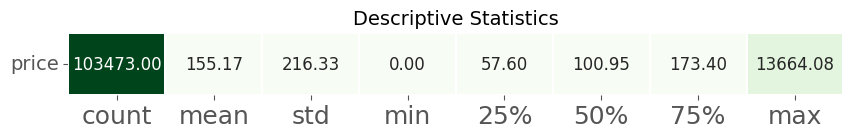

In [32]:
def desc_stats(dataframe):
    desc_df = pd.DataFrame(index=dataframe.columns, 
                           columns=dataframe.describe().T.columns,
                           data=dataframe.describe().T)
    
    f, ax = plt.subplots(figsize=(10, desc_df.shape[0] * 0.81))
    sns.heatmap(desc_df,
                annot=True,
                cmap="Greens",
                fmt='.2f',
                ax=ax,
                linecolor='white',
                linewidths=1.1,
                cbar=False,
                annot_kws={"size": 12})
    plt.xticks(size=18)
    plt.yticks(size=14, rotation=0)
    plt.title("Descriptive Statistics", size=14)
    plt.show()
    
numerical_columns = rfm_df.select_dtypes(include=[float, int])
desc_stats(numerical_columns)


Some observations that I have made from the previous descriptive statitics:

- Wide Range of Prices: The prices range from 0.00 to 13,664.08, indicating a wide range of products with varying prices.
- Skewed Distribution: The large difference between the mean (155.17) and the median (100.95) suggests that the price distribution might be right-skewed. This skewness is also indicated by the high standard deviation (216.33), showing that a few high-priced items are pulling the mean up.

Two other observations that I would like to investigate more:
- Outliers: The maximum value (13,664.08) is significantly higher than the 75th percentile (189.06), indicating the presence of outliers or very high-priced items in the dataset.
- Zero value: The minimum price is 0.00, indicating that there is at least one order with a price of 0. This could represent a free item, a fully discounted product, or potentially an error in the data. 

In [33]:
rfm_df[rfm_df['price'] > 10000] # let me check the ones above 10000

,order_id,customer_id,order_status,product_category,price
order_date,,,,,
2017-09-29 15:24:52,03caa2c082116e1d31e67e9ae3700499,0a0a92112bd4c708ca5fde585afaa872,delivered,fixed_telephony,13664.08


The product category is fixed telephony, so It could make sense that it cost that much.

Now let me check the ones where the price was zero.

In [34]:
rfm_df[rfm_df['price'] == 0] 

,order_id,customer_id,order_status,product_category,price
order_date,,,,,
2017-06-08 21:18:45,45ed6e85398a87c253db47c2d9f48216,e4000306cf2f63714e6bb70dd20a6592,delivered,perfumery,0.0
2017-04-20 12:45:34,fa65dad1b0e818e3ccc5cb0e39231352,8af7ac63b2efbcbd88e5b11505e8098a,shipped,garden_tools,0.0
2017-10-26 23:51:35,6ccb433e00daae1283ccc956189c82ae,677ad9cdca6c47c733f0cc6e23d7bb4c,delivered,sports_leisure,0.0
2017-05-27 19:20:24,b23878b3e8eb4d25a158f57d96331b18,9077449283dc1319d5e51fb3159b28e2,delivered,consoles_games,0.0
2018-01-24 23:24:14,8bcbe01d44d147f901cd3192671144db,cc5aa1b8337e394da54980226bb0f6d4,delivered,stationery,0.0


The presence of zero price orders could be due to several reasons like promotional offers, influencers' gifts, discount codes... Since the number of such orders is very small, I will also drop them to ensure I don't distort the analysis of monetary value. The zero values do not represent typical purchasing behavior.

In [36]:
rfm_df

,order_id,customer_id,order_status,product_category,price
order_date,,,,,
2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,housewares,18.12
2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,housewares,2.00
2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,housewares,18.59
2018-07-24 20:41:37,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,perfumery,141.46
2018-08-08 08:38:49,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,auto,179.12
...,...,...,...,...,...
2017-03-09 09:54:05,9c5dedf39a927c1b2549525ed64a053c,6359f309b166b0196dbf7ad2ac62bb5a,delivered,health_beauty,85.08
2018-02-06 12:58:58,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,delivered,baby,195.00
2017-08-27 14:46:43,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,delivered,home_appliances_2,271.01


### Some EDA analysis

What are the peak order timings?



In [38]:
rfm_df.reset_index(inplace=True)

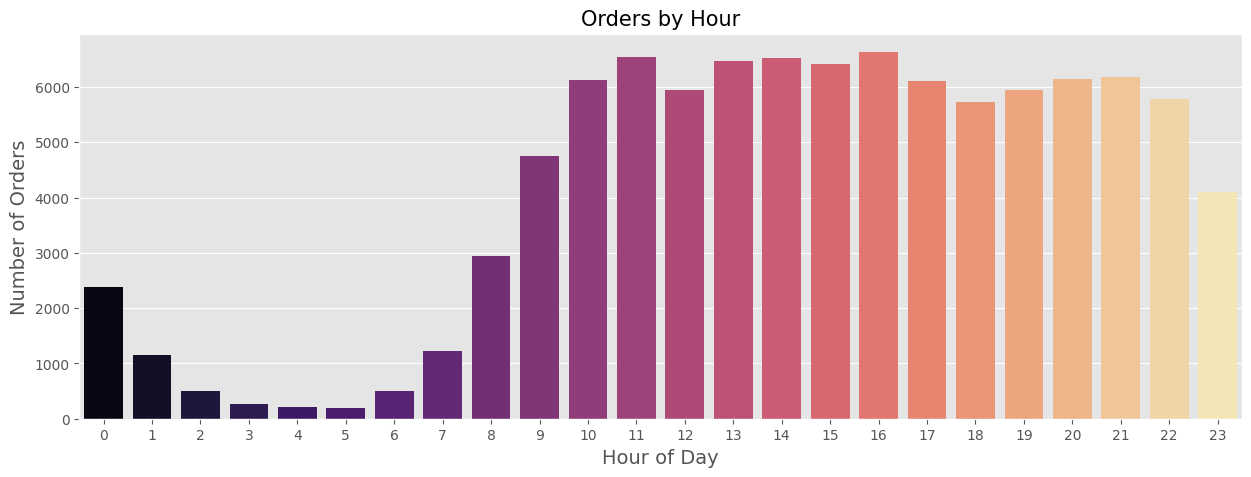

In [39]:
orders_byHour = rfm_df.groupby(rfm_df.order_date.dt.hour)['order_id'].nunique().reset_index()
plt.figure(figsize = (15, 5))
sns.barplot(x = 'order_date', y = 'order_id', data = orders_byHour, palette = 'magma')
plt.xlabel("Hour of Day", fontsize = 14)
plt.ylabel("Number of Orders", fontsize = 14)
plt.title("Orders by Hour", fontsize = 15)
plt.show()

- Peak Ordering Times: The highest number of orders occurs around the daym until almost 22:00.
- Low Early Morning Activity: The number of orders is minimal during the early morning hours (2:00 to 5:00), suggesting low customer engagement during these times.

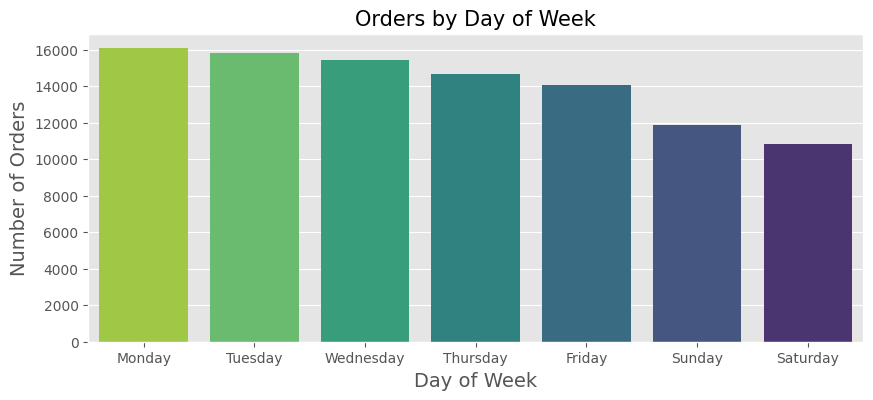

In [40]:
orders_byDays = rfm_df.groupby(rfm_df.order_date.dt.day_name())['order_id'].nunique().reset_index().sort_values('order_id', ascending = False)
plt.figure(figsize = (10, 4))
sns.barplot(x = 'order_date', y = 'order_id', data = orders_byDays, palette = 'viridis_r')
plt.xlabel("Day of Week", fontsize = 14)
plt.ylabel("Number of Orders", fontsize = 14)
plt.title("Orders by Day of Week", fontsize = 15)
plt.show()

Monday sees the highest number of orders, suggesting that customer activity peaks at the start of the week while we see a weekend dip indicating low customer engagement on the weekend.

What are the best and the worst performing product categories in terms of number of orders?

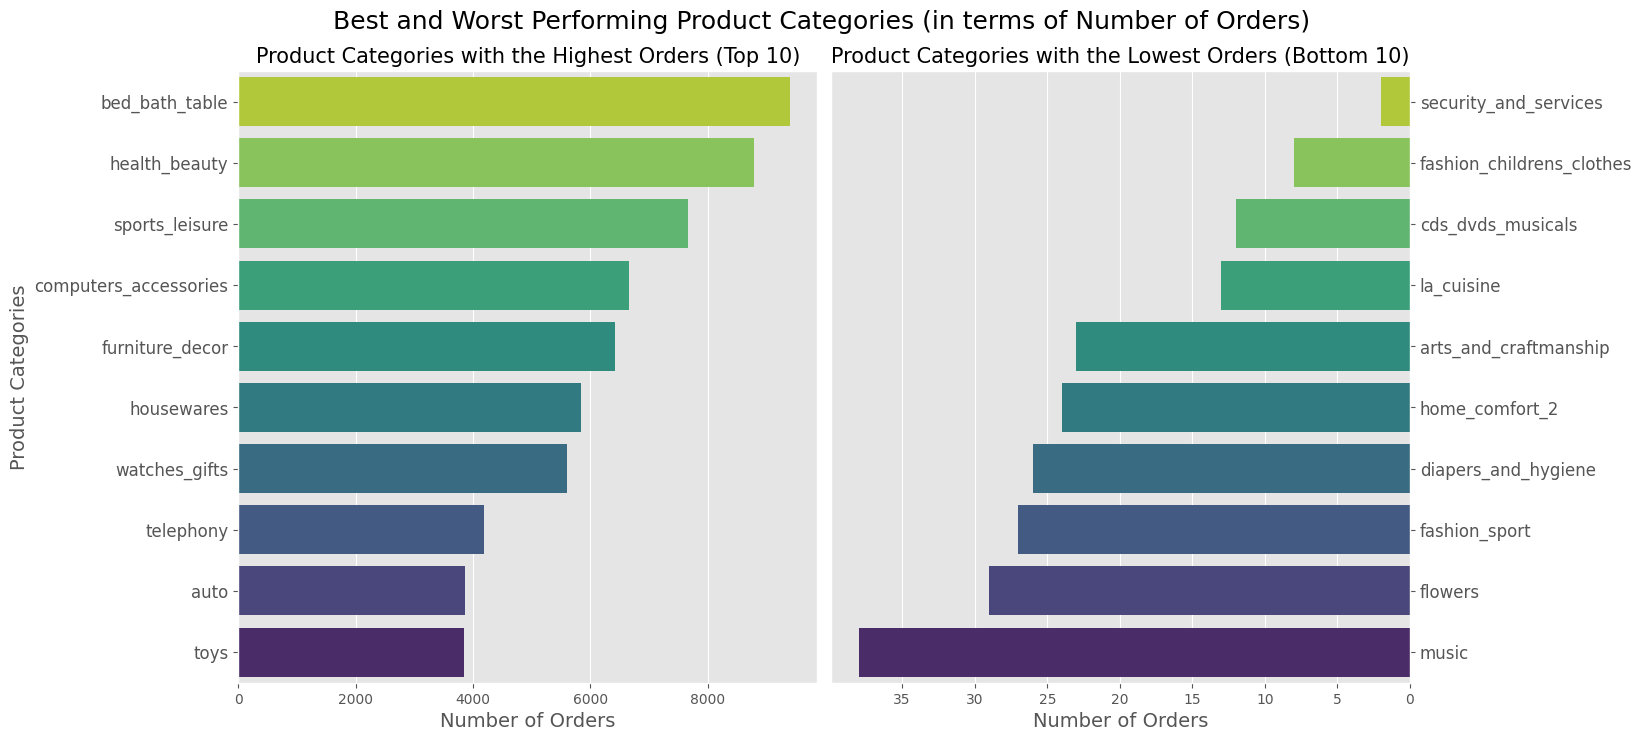

In [41]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16.5, 7.5))

prodCat_TopOrders = rfm_df.groupby(rfm_df['product_category'])['order_id'].nunique().reset_index().sort_values('order_id', ascending = False)
sns.barplot(x = 'order_id', y = 'product_category', data = prodCat_TopOrders[:10], palette = 'viridis_r', ax = ax[0])
ax[0].set_xlabel("Number of Orders", fontsize = 14)
ax[0].set_ylabel("Product Categories", fontsize = 14)
ax[0].tick_params(axis = 'y', labelsize = 12)
ax[0].set_title("Product Categories with the Highest Orders (Top 10)", fontsize = 15)

prodCat_BotOrders = rfm_df.groupby(rfm_df['product_category'])['order_id'].nunique().reset_index().sort_values('order_id', ascending = True)
sns.barplot(x = 'order_id', y = 'product_category', data = prodCat_BotOrders[:10], palette = 'viridis_r', ax = ax[1])
ax[1].set_xlabel("Number of Orders", fontsize = 14)
ax[1].set_ylabel("")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis = 'y', labelsize = 12)
ax[1].set_title("Product Categories with the Lowest Orders (Bottom 10)", fontsize = 15)

plt.suptitle("Best and Worst Performing Product Categories (in terms of Number of Orders)", fontsize = 18)
plt.tight_layout(pad = 1)
plt.show()

## Preparing for RFM analysis

### Recency

In [42]:
df_recency = rfm_df.groupby('customer_id').agg(MaxInvoiceDate=('order_date','max')).reset_index()
reference_date = rfm_df['order_date'].max()
df_recency['Recency'] = (reference_date - df_recency['MaxInvoiceDate']).dt.days

In [43]:
df_recency.head(10)

,customer_id,MaxInvoiceDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292
5,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05 19:33:16,150
6,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20 12:57:23,135
7,00053a61a98854899e70ed204dd4bafe,2018-02-28 11:15:41,186
8,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,547
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2018-03-12 15:22:12,174


### Frenquency

In [44]:
df_frequency = rfm_df.groupby(["customer_id"]).agg({"order_id": "nunique"}).reset_index()

df_frequency.rename(columns = {"order_id": "Frequency"}, inplace = True)

In [45]:
df_frequency.head(10)

,customer_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
5,0004bd2a26a76fe21f786e4fbd80607f,1
6,00050ab1314c0e55a6ca13cf7181fecf,1
7,00053a61a98854899e70ed204dd4bafe,1
8,0005e1862207bf6ccc02e4228effd9a0,1
9,0005ef4cd20d2893f0d9fbd94d3c0d97,1


### Monetary

In [46]:
df_monetary = rfm_df.groupby('customer_id').agg(Monetary=('price', 'sum')).reset_index()

In [47]:
df_monetary.head(10)

,customer_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
5,0004bd2a26a76fe21f786e4fbd80607f,166.98
6,00050ab1314c0e55a6ca13cf7181fecf,35.38
7,00053a61a98854899e70ed204dd4bafe,419.18
8,0005e1862207bf6ccc02e4228effd9a0,150.12
9,0005ef4cd20d2893f0d9fbd94d3c0d97,129.76


In [48]:
df_rfm1 = pd.merge(df_recency, df_frequency, on='customer_id', how='left')
df_rfm = pd.merge(df_rfm1, df_monetary, on='customer_id', how='left')
df_rfm.drop(columns=['MaxInvoiceDate'], inplace=True)
df_rfm.head()

,customer_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19
2,0000f46a3911fa3c0805444483337064,541,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89


## Inspectation of the RFM table

In [49]:
df_rfm[['Recency','Frequency','Monetary']].describe(percentiles=[.01,.1,.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
Recency,95559.0,243.029563,153.119301,0.00,13.00,46.00,119.000,224.0,352.00,471.00,525.00,580.00,728.00
Frequency,95559.0,1.034073,0.212155,1.00,1.00,1.00,1.000,1.0,1.00,1.00,1.00,2.00,17.00
Monetary,95559.0,168.021263,232.672282,6.18,22.69,40.09,63.095,108.0,184.26,324.72,489.09,1137.11,13664.08


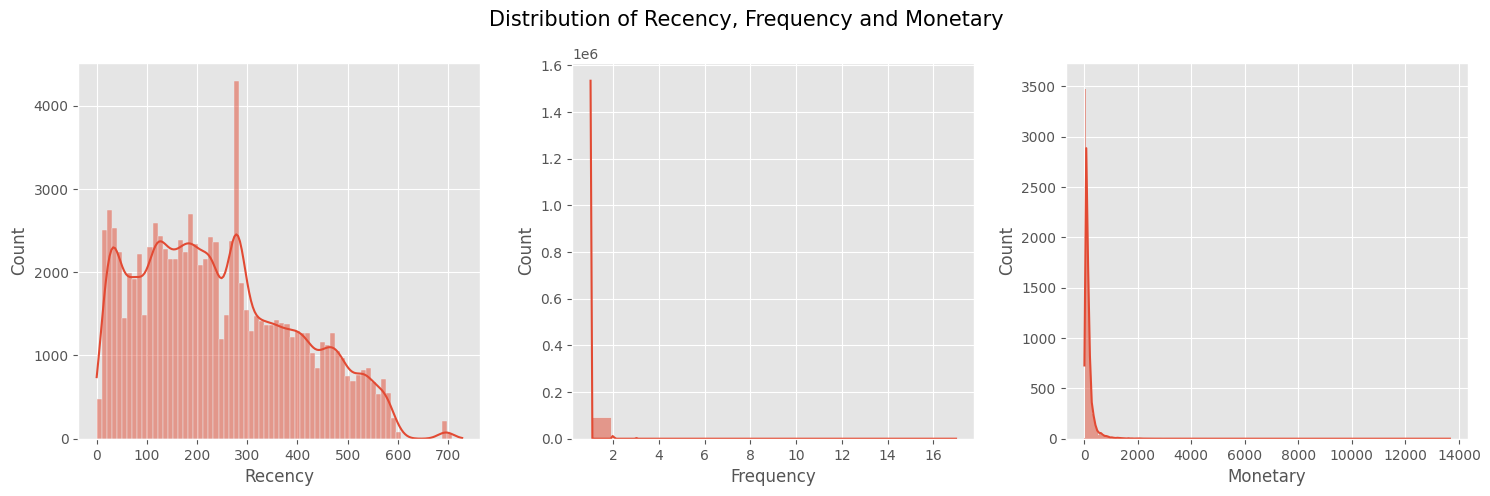

In [50]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
sns.histplot(df_rfm['Recency'], kde = True, ax = ax[0])
sns.histplot(df_rfm['Frequency'], kde = True, ax = ax[1])
sns.histplot(df_rfm['Monetary'], kde = True, ax = ax[2])
plt.suptitle('Distribution of Recency, Frequency and Monetary', fontsize = 15)
plt.tight_layout(pad = 1)
plt.show()

### Observations:

- Customer Recency: Most customers made their last purchase between 100 and 400 days ago, with a significant drop-off for customers who haven't purchased in over a year.

- Purchase Frequency: The vast majority of customers are one-time purchasers, with very few repeat customers.

- Monetary Value: While most customers have relatively low monetary values, there are a few high-value customers driving up the average.


In [52]:
quantiles = df_rfm[['Recency', 'Frequency', 'Monetary']].quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

In [53]:
quantiles

{'Recency': {0.25: 119.0, 0.5: 224.0, 0.75: 352.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 63.095, 0.5: 108.0, 0.75: 184.26}}

In [54]:
def r_score(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

df_rfm['R_score'] = df_rfm['Recency'].apply(r_score, args=('Recency', quantiles))
df_rfm['F_score'] = df_rfm['Frequency'].apply(r_score, args=('Frequency', quantiles))
df_rfm['M_score'] = df_rfm['Monetary'].apply(r_score, args=('Monetary', quantiles))
df_rfm['RFM_Score'] = df_rfm.R_score.map(str) + df_rfm.F_score.map(str) + df_rfm.M_score.map(str)


In [55]:
df_rfm

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,1,1,3,113
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,1,1,1,111
2,0000f46a3911fa3c0805444483337064,541,1,86.22,4,1,2,412
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,3,1,1,311
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89,3,1,4,314
...,...,...,...,...,...,...,...,...
95554,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,2067.42,4,1,4,414
95555,fffea47cd6d3cc0a88bd621562a9d061,266,1,84.58,3,1,2,312
95556,ffff371b4d645b6ecea244b27531430a,572,1,112.46,4,1,3,413
95557,ffff5962728ec6157033ef9805bacc48,123,1,133.69,2,1,3,213


### Scores explanation

Recency (R) scores: 
- 1: Customer's last purchase is in the oldest 25% (least recent).
- 2: Customer's last purchase is between 25% and 50% (second quartile).
- 3: Customer's last purchase is between 50% and 75% (third quartile).
- 4: Customer's last purchase is in the most recent 25%.

Frequency (F) scores :
- 1: Customer is in the lowest 25% for the number of purchases.
- 2: Customer is between 25% and 50% for the number of purchases.
- 3: Customer is between 50% and 75% for the number of purchases.
- 4: Customer is in the highest 25% for the number of purchases.

Monetary (M) scores:
- 1: Customer is in the lowest 25% for the amount spent.
- 2: Customer is between 25% and 50% for the amount spent.
- 3: Customer is between 50% and 75% for the amount spent.
- 4: Customer is in the highest 25% for the amount spent.

In [61]:
def segment_rfm(score):
    if score == '444':
        return 'Diamond'
    elif score in ['333', '334', '343', '344', '433', '434', '443']:
        return 'Gold'
    elif score in ['222', '223', '232', '233', '322', '323', '332', '333', '224', '242', '243', '244']:
        return 'Silver'
    elif score in ['111', '112', '121', '122', '131', '132', '211', '212', '213', '221', '231', '241']:
        return 'Bronze'
    else:
        return 'Steel'

df_rfm['Segment'] = df_rfm['RFM_Score'].apply(segment_rfm)

In [62]:
df_rfm

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,1,1,3,113,Steel
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,1,1,1,111,Bronze
2,0000f46a3911fa3c0805444483337064,541,1,86.22,4,1,2,412,Steel
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,3,1,1,311,Steel
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89,3,1,4,314,Steel
...,...,...,...,...,...,...,...,...,...
95554,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,2067.42,4,1,4,414,Steel
95555,fffea47cd6d3cc0a88bd621562a9d061,266,1,84.58,3,1,2,312,Steel
95556,ffff371b4d645b6ecea244b27531430a,572,1,112.46,4,1,3,413,Steel
95557,ffff5962728ec6157033ef9805bacc48,123,1,133.69,2,1,3,213,Bronze


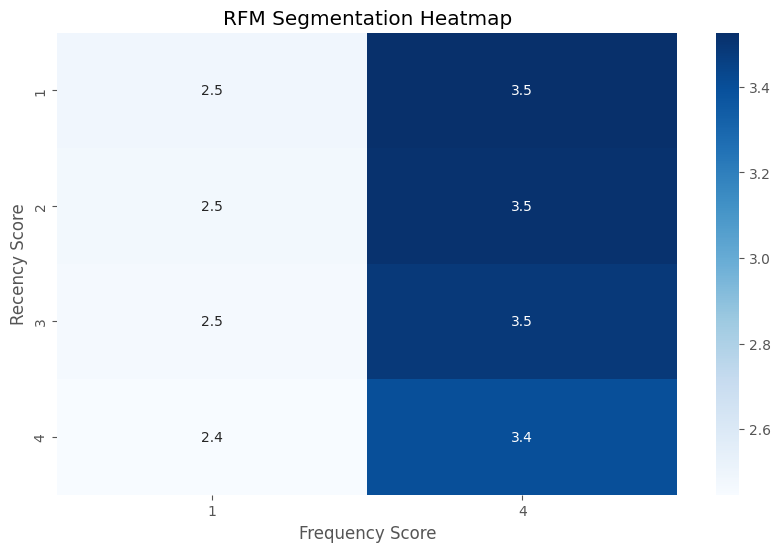

In [63]:
rfm_matrix = df_rfm.pivot_table(index='R_score', columns='F_score', values='M_score', aggfunc='mean').fillna(0)
plt.figure(figsize=(10,6))
sns.heatmap(rfm_matrix, annot=True, fmt=".1f", cmap='Blues')
plt.title('RFM Segmentation Heatmap')
plt.xlabel('Frequency Score')
plt.ylabel('Recency Score')
plt.show()


Customers with a Frequency Score of 4 (indicating high purchase frequency) consistently have higher average monetary values, regardless of their Recency Score. In contrast, customers with a Frequency Score of 1 (indicating low purchase frequency) show lower average monetary values across all recency score.

This suggests that purchase frequency is a stronger indicator of higher spending compared to recency.

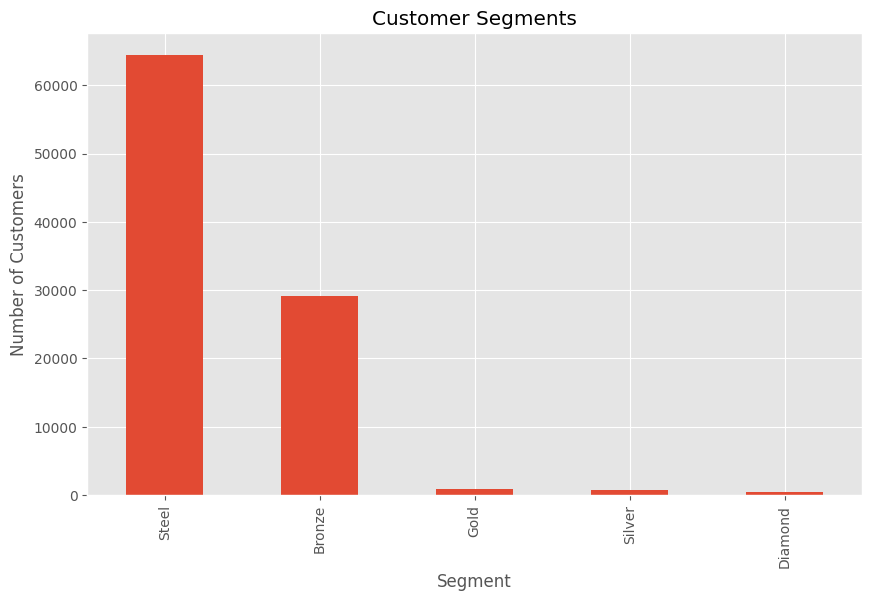

In [66]:
plt.figure(figsize=(10,6))
df_rfm['Segment'].value_counts().plot(kind='bar')
plt.title('Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()


- Steel Segment Dominance: The Steel segment is by far the largest, with over 60,000 customers. This indicates that the majority of customers have lower RFM scores, suggesting less recent, less frequent purchases with lower monetary value.

- Bronze Segment: The Bronze segment is the second largest, with around 30,000 customers. These customers have slightly better RFM scores compared to the Steel segment, indicating somewhat more recent or frequent purchases with slightly higher monetary value.

- Minor Segments (Gold, Silver, Diamond): The Gold, Silver, and Diamond segments have significantly fewer customers compared to the Steel and Bronze segments. Each of these segments has a very small customer base, indicating a limited number of high-value customers with very recent, frequent, and high monetary purchases.



Implications: The skewed distribution highlights that while the majority of customers fall into the lower-value segments, there is a small but potentially very valuable group of customers in the higher segments. This presents an opportunity for targeted marketing efforts to move customers from Steel and Bronze segments to higher-value segments.